In [32]:
pip install geopandas matplotlib contextily


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------- -------------------------------- 61.4/323.6 kB 1.7 MB/s eta 0:00:01
   ------------- -------------------------- 112.6/323.6 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 122.9/323.6 kB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 235.5/323.6 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 256.0/323.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 256.0/323.6 kB 1.3 MB/s eta 0:00:01
   -------------------------------- ----- 276.5/323.6 kB 896.4 kB/s eta 0:00:01
   -------------------------------------  317.4/323.6 kB 936.6 kB/s eta 0:00:01
   -------------------------------------- 323.6/323.6 kB 771.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--

In [16]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import box

In [18]:
# Set the working directory
os.chdir('C:/Users/user/Documents/Unibo/Economics and Econometrics/Second Year/First Semester/Introduction to Python for Economists/Project')

nuclear_plants = pd.read_csv('nuclear_power_plants.csv') # data from "https://github.com/cristianst85/GeoNuclearData/blob/master/data/csv/denormalized/nuclear_power_plants.csv"
print(nuclear_plants.head())

# Consider only operational nuclear plants
operational_nuclear_plants = ["Operational"]
nuclear_plants = nuclear_plants[nuclear_plants['Status'].isin(operational_nuclear_plants)]
print(nuclear_plants.head())

   Id                  Name   Latitude  Longitude Country CountryCode  \
0   1                Ågesta  59.206000   18.08290  Sweden          SE   
1   2  Akademik Lomonosov-1  69.709579  170.30625  Russia          RU   
2   3  Akademik Lomonosov-2  69.709579  170.30625  Russia          RU   
3   4              Akhvaz-1        NaN        NaN    Iran          IR   
4   5              Akhvaz-2        NaN        NaN    Iran          IR   

        Status ReactorType        ReactorModel ConstructionStartAt  \
0     Shutdown        PHWR                 NaN          1957-12-01   
1  Operational         PWR  KLT-40S 'Floating'          2007-04-15   
2  Operational         PWR  KLT-40S 'Floating'          2007-04-15   
3      Planned         NaN                 NaN                 NaN   
4      Planned         NaN                 NaN                 NaN   

  OperationalFrom OperationalTo  Capacity              LastUpdatedAt  \
0      1964-05-01    1974-06-02       9.0  2015-05-24T04:51:37+03:00

In [20]:
eu_iso2_codes = [
    "AT", "BE", "BG", "HR", "CY",
    "CZ", "DK", "EE", "FI", "FR",
    "DE", "GR", "HU", "IE", "IT",
    "LV", "LT", "LU", "MT", "NL",
    "PL", "PT", "RO", "SK", "SI",
    "ES", "SE"
]

# Filter for EU countries
nuclear_plants = nuclear_plants[nuclear_plants['CountryCode'].isin(eu_iso2_codes)]

In [70]:
# Load the shapefile
sp_path = "NUTS_RG_01M_2021_4326_LEVL_3/NUTS_RG_01M_2021_4326_LEVL_3_repaired.shp"  
eu_map = gpd.read_file(sp_path)

# Define the bounding box for continental Europe
bounding_box = {
    "minx": -10,  # Western limit
    "maxx": 30,   # Eastern limit
    "miny": 35,   # Southern limit
    "maxy": 70    # Northern limit
}

In [72]:
print(eu_map)
print(eu_map.crs)

     NUTS_ID  LEVL_CODE CNTR_CODE                            NAME_LATN  \
0      NO0B2          3        NO                             Svalbard   
1      NO0B1          3        NO                 Jan Mayen\r\n   \r\n   
2      HR064          3        HR          Krapinsko-zagorska upanija   
3      DE21A          3        DE                               Erding   
4      DE94E          3        DE                 Osnabrück, Landkreis   
...      ...        ...       ...                                  ...   
1509   UKM73          3        UK          East Lothian and Midlothian   
1510   UKM75          3        UK                   Edinburgh, City of   
1511   UKM76          3        UK                              Falkirk   
1512   UKM78          3        UK                         West Lothian   
1513   UKK24          3        UK  Bournemouth, Christchurch and Poole   

                                NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE  \
0                              

In [74]:
# Filter for EU countries
eu_map = eu_map[eu_map['CNTR_CODE'].isin(eu_iso2_codes)]


# Create a bounding box as a shapely object
bounding_polygon = box(bounding_box["minx"], bounding_box["miny"], bounding_box["maxx"], bounding_box["maxy"])

# Clip the map using the bounding box
eu_map = eu_map.clip(bounding_polygon)

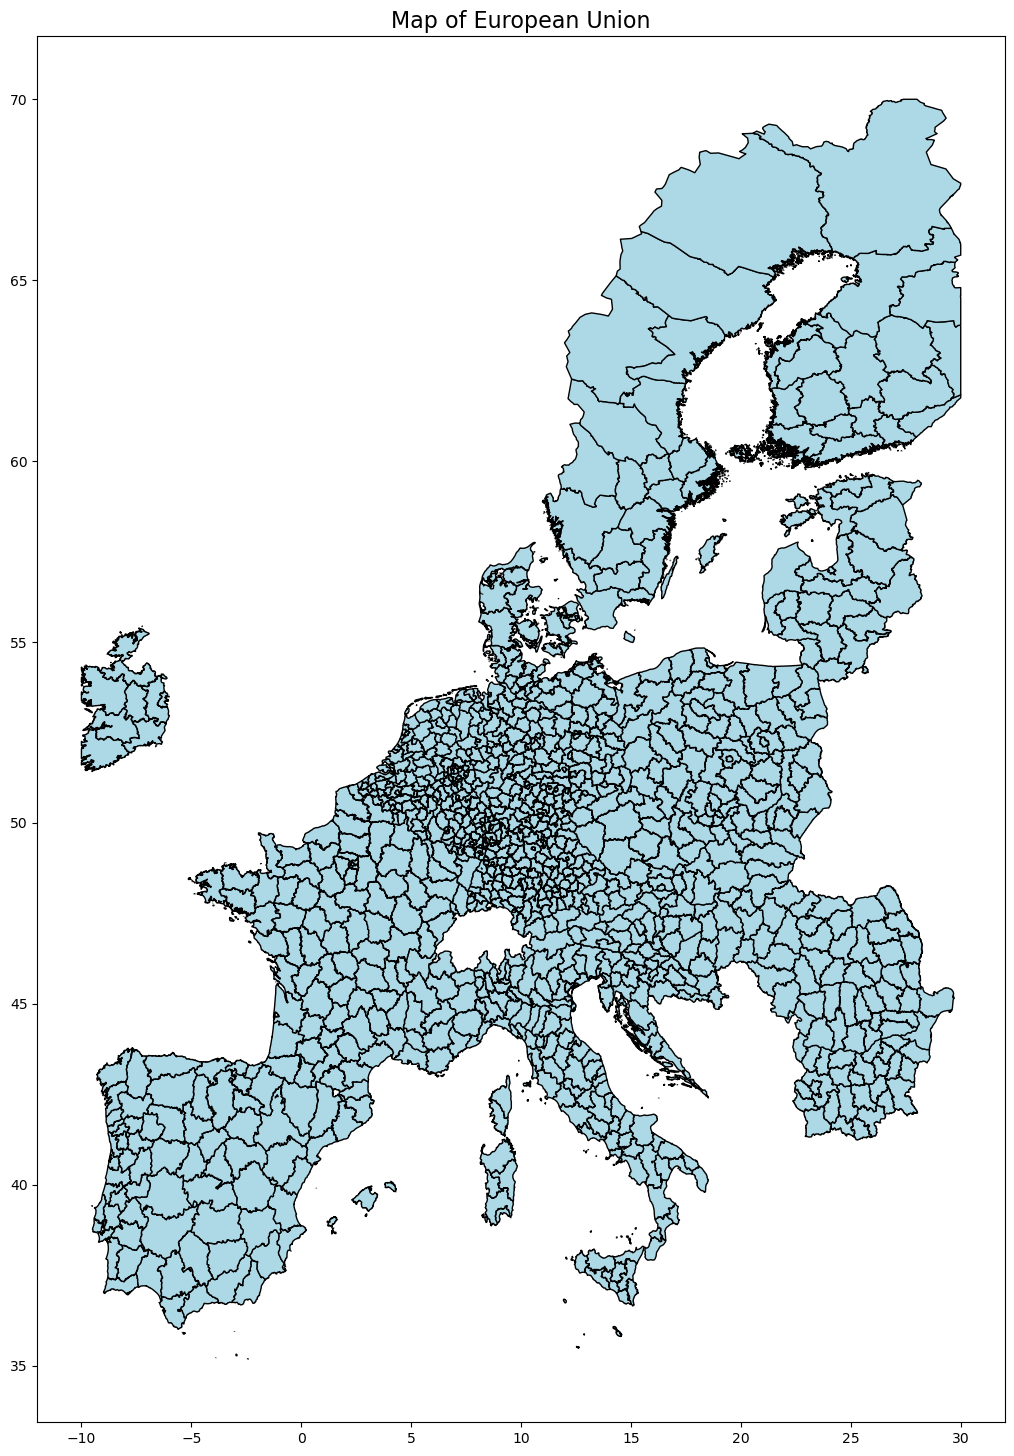

In [80]:
# Plot the map
fig, ax = plt.subplots(figsize=(18, 18))
eu_map.plot(ax=ax, color="lightblue", edgecolor="black")

# Add a title
ax.set_title("Map of European Union NUTS3 regions", fontsize=16)

# Show the plot
plt.show()

In [82]:
# Create a GeoDataFrame for nuclear plants
plants_gdf = gpd.GeoDataFrame(
    nuclear_plants, geometry=gpd.points_from_xy(nuclear_plants.Longitude, nuclear_plants.Latitude), crs="EPSG:4326"
)
print(plants_gdf.crs)

EPSG:4326


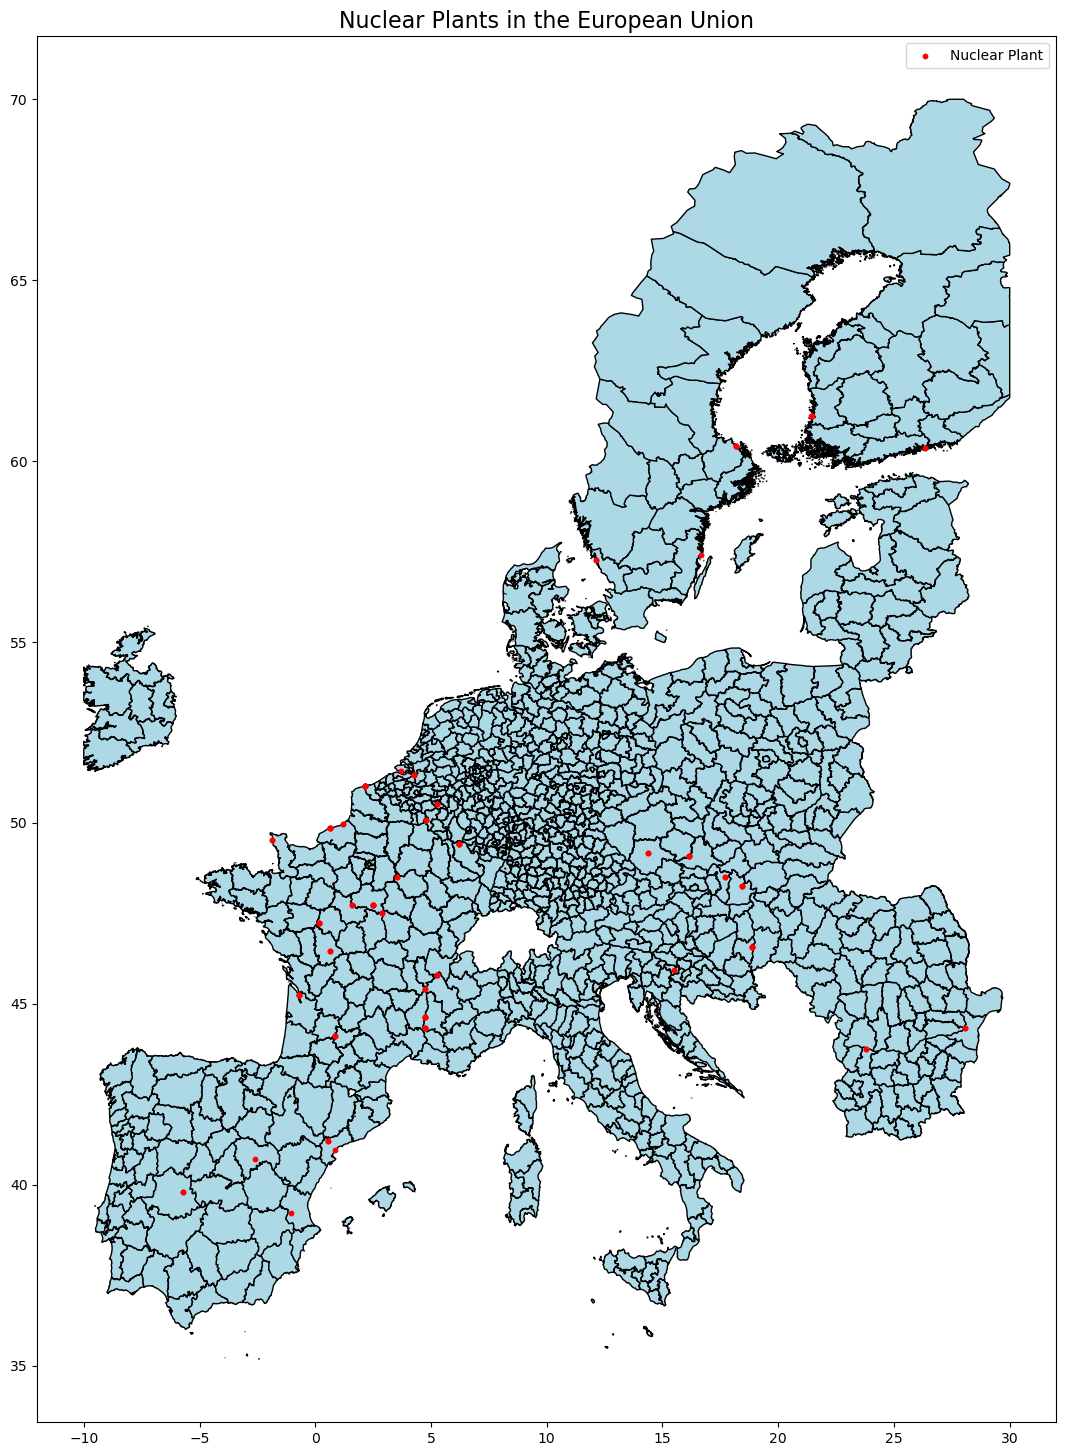

In [84]:
# Plot EU map with nuclear plants
fig, ax = plt.subplots(figsize=(18, 18))
eu_map.plot(ax=ax, color="lightblue", edgecolor="black")
plants_gdf.plot(ax=ax, color="red", markersize=10, label="Nuclear Plant")

# Add title and legend
ax.set_title("Operative Nuclear Plants in the European Union", fontsize=16)
ax.legend()

# Show the plot
plt.show()

In [68]:
# Load the file into a pandas DataFrame
data = pd.read_csv("estat_tgs00003.tsv.gz", sep="\t", compression="gzip") # GDP per capita regional

# Display the first few rows
print(data)

    freq,unit,geo\TIME_PERIOD     2011      2012      2013      2014   \
0              A,MIO_EUR,AL01   2214.58   2297.46   2276.67   2290.45   
1              A,MIO_EUR,AL02   4195.20   4294.60   4319.08   4535.08   
2              A,MIO_EUR,AL03   2858.55   2993.75   3029.61   3143.06   
3              A,MIO_EUR,AT11   7012.58   7365.43   7539.32   7737.13   
4              A,MIO_EUR,AT12  48511.32  49802.60  50470.13  52049.38   
..                        ...       ...       ...       ...       ...   
302            A,MIO_EUR,TRB1   8083.86   9082.60   9560.26   9105.19   
303            A,MIO_EUR,TRB2   6449.98   8200.98   7759.79   7509.00   
304            A,MIO_EUR,TRC1  11257.49  13546.61  14946.38  14908.18   
305            A,MIO_EUR,TRC2  11515.81  13078.78  14050.38  13221.90   
306            A,MIO_EUR,TRC3   7892.19   9077.43   9685.72   9529.04   

        2015      2016      2017       2018       2019       2020       2021   \
0     2418.75   2549.18   2707.01   2954.8